In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
from matplotlib import pyplot as plt, animation, rc,colors
from datetime import datetime, timedelta
from cartopy import crs, feature
import cmocean
import yaml

from IPython.display import Image
rc('animation', html='html5')

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions23 import *

In [2]:
# Define paths
local = 0 #Set to 0 when working on server
paths = path(local)
config='/home/jvalenti/MOAD/analysis-jose/OParcels/yaml/SalishSea_Population.yaml'

In [3]:
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
dt = param['param']['dt'] #toggle between - or + to pick backwards or forwards 
N = param['param']['N'] # number of deploying locations
n = param['param']['n'] # 1000   # number of particles per location
dmin = param['param']['dmin'] #minimum depth
dd = param['param']['dd'] #max depth difference from dmin
name = param['file']['name'] #name output file
Mfc = param['param']['MFc']
#WS = param['particle']['Ws']

daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile = os.path.join(paths['out'], fn)

In [4]:
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])
ds = xr.open_dataset(outfile)

/home/jvalenti/conda_envs/Parcels_v2/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [5]:
DS=ds.to_dataframe()

DSsed=DS[DS.beached==3.0]
DSbe=DS[DS.beached==1.0]
DScol=DS[DS.beached==0.0]

Sedlon=np.array(DSsed.iloc[:,0])#.sort_values(by='time')
Seddepth=np.array(DSsed.iloc[:,2])#.sort_values(by='time')
Sedlat=np.array(DSsed.iloc[:,1])#.sort_values(by='time')

Belon=np.array(DSbe.iloc[:,0])#.sort_values(by='time')
Belat=np.array(DSbe.iloc[:,1])#.sort_values(by='time')

Collon=np.array(DScol.iloc[:,0])#.sort_values(by='time')
Collat=np.array(DScol.iloc[:,1])#.sort_values(by='time')

/home/jvalenti/conda_envs/Parcels_v2/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [6]:
time= np.array(DS.time[0,:])
countime = [] 
countime1 = [] 
countime2 = [] 
for t in time:
    countime.append(len(DScol.time[DScol.time==t]))
    countime1.append(len(DSsed.time[DSsed.time==t]))
    countime2.append(len(DSbe.time[DSbe.time==t]))
#np.savetxt("time_2.csv", countime, delimiter=",")
#countime=np.genfromtxt('time0.csv', delimiter=',')
#countime1=np.genfromtxt('time1.csv', delimiter=',')
#countime2=np.genfromtxt('time_2.csv', delimiter=',')

In [7]:
print(f'{countime[-1]*100/(countime[-1]+countime2[-1]+countime1[-1]):.2f}% of fibers are found in the water column by the end of the run')

0.91% of fibers are found in the water column by the end of the run


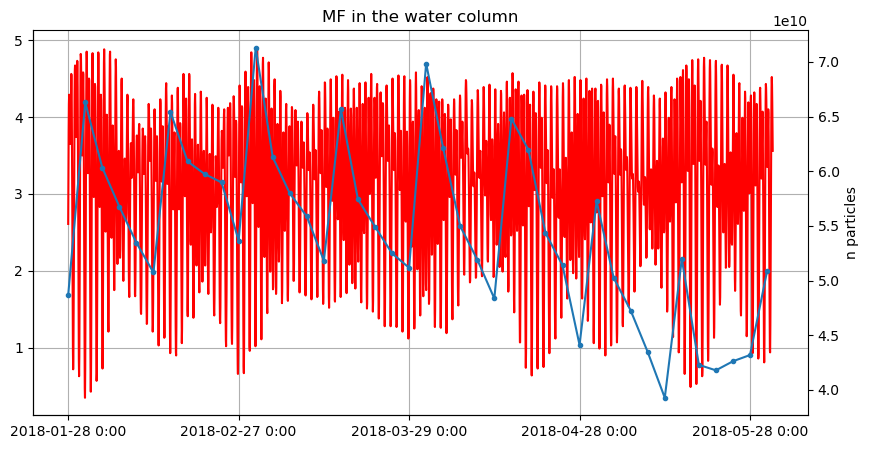

In [8]:
Point_At = pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/7795-01-JAN-2018_slev-2.csv',index_col=[0])
SLEV = np.array(Point_At['SLEV(metres)'])
Days = np.array(Point_At.index)
Time=np.linspace(0,120,28810)
fig,ax=plt.subplots(1,figsize=(10,5))

plt.grid()
ax2 = ax.twinx()

ax.plot(Days[72*9:],SLEV[72*9:],'red')
ax.set_xticks(Days[72*9::720])

ax2.plot(Days[72*9::72],np.array(countime[9:])*1e7,'.-')
ax2.set_xticks(Days[72*9::720])
#plt.plot(time,np.array(countime1)*1e7,label='sediment')
#plt.plot(time,np.array(countime2)*1e7,label='beached')
#plt.legend()
plt.xlabel('time [h]')
plt.ylabel('n particles')
plt.title('MF in the water column')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


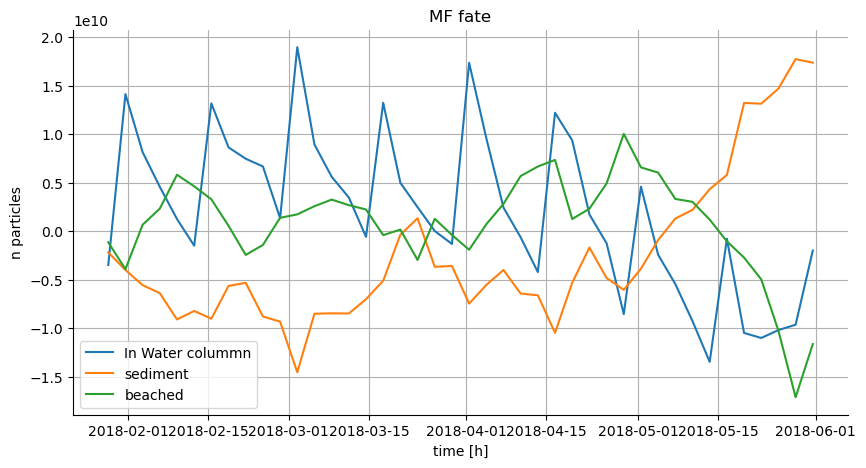

In [9]:
from scipy import signal

countimed=signal.detrend(countime) 
countime1d=signal.detrend(countime1) 
countime2d=signal.detrend(countime2) 
fig,ax=plt.subplots(1,figsize=(10,5))
plt.plot(time[9:],np.array(countimed[9:])*1e7,label='In Water colummn')
plt.plot(time[9:],np.array(countime1d[9:])*1e7,label='sediment')
plt.plot(time[9:],np.array(countime2d[9:])*1e7,label='beached')
#plt.legend()
plt.xlabel('time [h]')
plt.ylabel('n particles')
plt.title('MF fate')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.grid()
plt.legend()

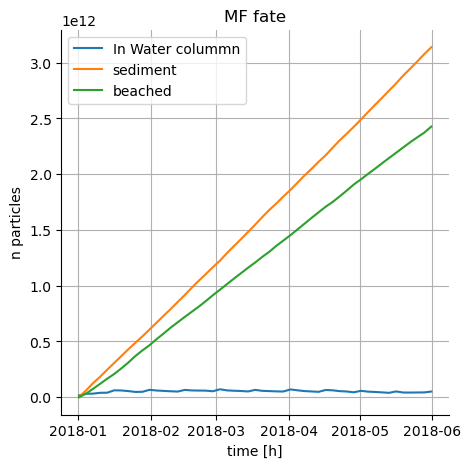

In [10]:
Time=np.linspace(0,120,28810)
fig,ax=plt.subplots(1,figsize=(5,5))
plt.plot(time,np.array(countime)*1e7,label='In Water colummn')
plt.plot(time,np.array(countime1)*1e7,label='sediment')
plt.plot(time,np.array(countime2)*1e7,label='beached')
#plt.legend()
plt.xlabel('time [h]')
plt.ylabel('n particles')
plt.title('MF fate')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.grid()
plt.legend()

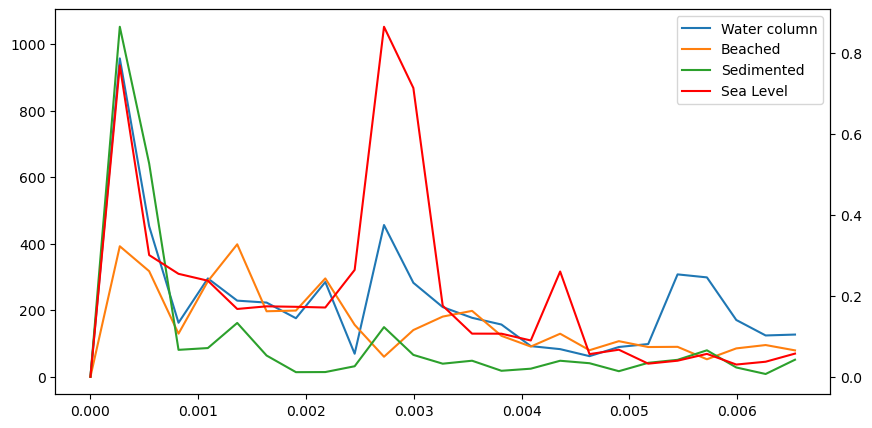

In [11]:
from scipy.fft import fft, fftfreq
# Number of sample points

((time[-1]-time[0])/1e9)/3600
t = np.arange(0,3672,72)

N = len(t)
# sample spacing
T = 72
x = np.linspace(0.0, N*T, N, endpoint=False)
xf = fftfreq(N, T)[:N//2]

y0 = countimed-np.mean(countimed)
yf0 = fft(y0)

y2 = countime2d-np.mean(countime2d)
yf2 = fft(y2)

y = countime1d-np.mean(countime1d)
yf = fft(y)

slev = SLEV[0::72]
ylev = slev-np.mean(slev)
yflev = fft(ylev)

fig,ax=plt.subplots(1,figsize=(10,5))

ax2 = ax.twinx()
a1=ax.plot(xf, 2.0/N * np.abs(yf0[0:N//2]),label='Water column')
a2=ax.plot(xf, 2.0/N * np.abs(yf2[0:N//2]),label='Beached')
a3=ax.plot(xf, 2.0/N * np.abs(yf[0:N//2]),label='Sedimented')
a4=ax2.plot(xf, 2.0/N * np.abs(yflev[0:N//2]),label='Sea Level',c='r')
lns = a1+a2+a3+a4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)


Text(0.5, 1.0, 'Particles beached')

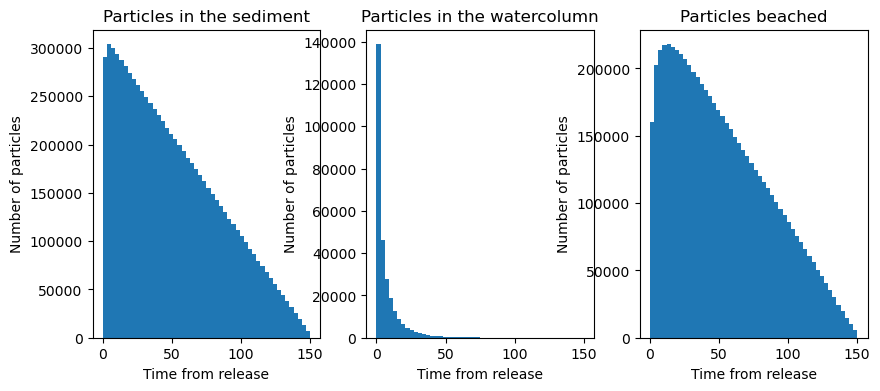

In [12]:
fig,axs=plt.subplots(1,3,figsize=(10,4))
axs[0].hist(DSsed.tau/86400, bins = 50)
axs[0].set_xlabel('Time from release')
axs[0].set_ylabel('Number of particles')
axs[0].set_title('Particles in the sediment')

axs[1].hist(DScol.tau/86400, bins = 50)
axs[1].set_xlabel('Time from release')
axs[1].set_ylabel('Number of particles')
axs[1].set_title('Particles in the watercolumn')

axs[2].hist(DSbe.tau/86400, bins = 50)
axs[2].set_xlabel('Time from release')
axs[2].set_ylabel('Number of particles')
axs[2].set_title('Particles beached')

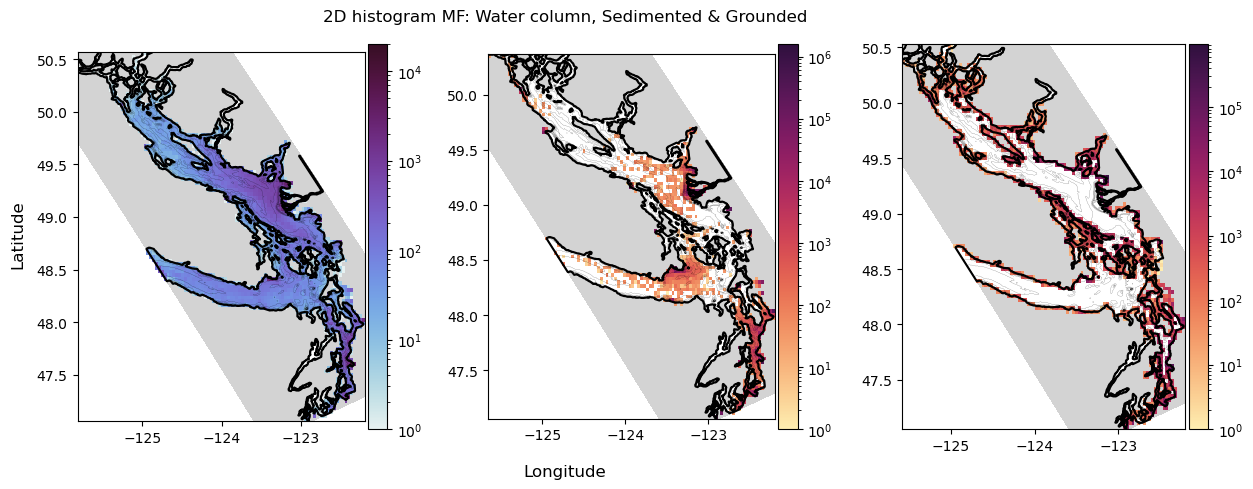

In [13]:
cm = cmocean.cm.dense

fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15, 5))
ax1.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax1.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax1.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')

ax2.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax2.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax2.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')

ax3.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax3.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax3.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')


aa=ax1.hist2d(Collon,Collat,100,norm = colors.LogNorm(), cmap =cm)
cb2=fig.colorbar(aa[3],ax=ax1,pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
#ax1.set_xlim([-124,-123])
#ax1.set_ylim([48,50])


aa2=ax2.hist2d(Sedlon,Sedlat,100,norm = colors.LogNorm(), cmap =cmocean.cm.matter)
#ax2.set_xlim([-124,-123])
#ax2.set_ylim([48,50])
cb2=fig.colorbar(aa2[3],ax=ax2,pad=0.01)
cb2.ax.get_yaxis().labelpad = 15

aa3=ax3.hist2d(Belon,Belat,100,norm = colors.LogNorm(), cmap =cmocean.cm.matter)
cb2=fig.colorbar(aa3[3],ax=ax3,pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
#ax3.set_xlim([-124,-123])
#ax3.set_ylim([48,50])

#ax1.set_xticks(np.arange(-125, -122, step=1))
#ax2.set_xticks(np.arange(-125, -122, step=1))
#ax3.set_xticks(np.arange(-125, -122, step=1))
ax1.set_aspect(1/np.sin(np.deg2rad(49)))
ax2.set_aspect(1/np.sin(np.deg2rad(49)))
ax3.set_aspect(1/np.sin(np.deg2rad(49)))


fig.suptitle(f'2D histogram MF: Water column, Sedimented & Grounded',y=0.95,x=0.45)
fig.supxlabel('Longitude',x=0.45)
fig.supylabel('Latitude',x=0.08)
plt.savefig("/home/jvalenti/MOAD/2dhist_area.pdf")

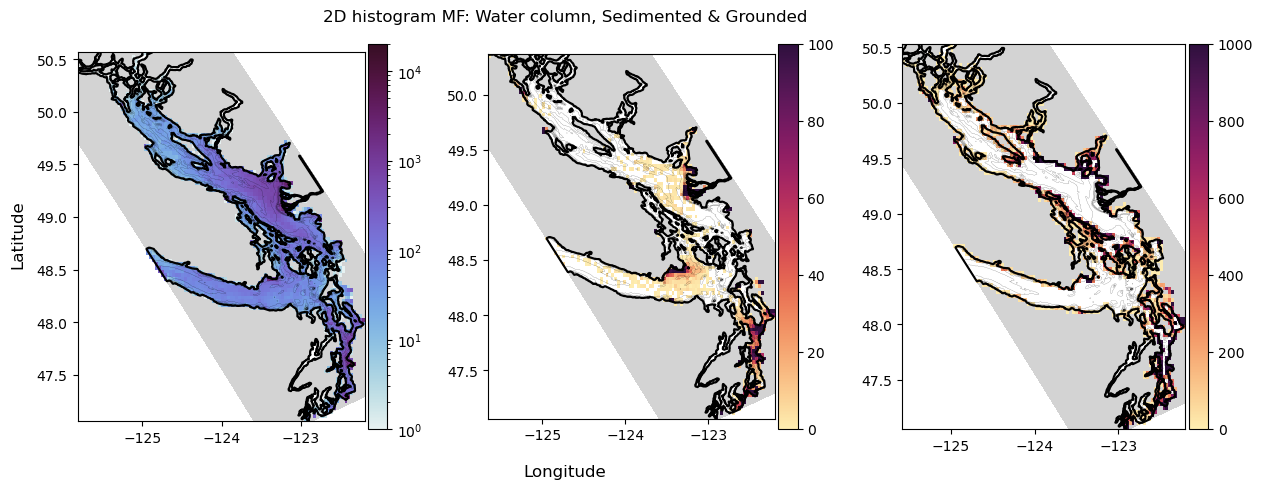

In [77]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15, 5))
ax1.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax1.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax1.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')

ax2.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax2.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax2.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')

ax3.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax3.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax3.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')


aa=ax1.hist2d(Collon,Collat,100,norm = colors.LogNorm(), cmap =cm)
cb2=fig.colorbar(aa[3],ax=ax1,pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
#ax1.set_xlim([-124,-123])
#ax1.set_ylim([48,50])


aa2=ax2.hist2d(Sedlon,Sedlat,100,cmin=1e-15,vmin=0,vmax=100, cmap =cmocean.cm.matter,weights=np.ones(len(Sedlat))*1.0e7*714/(1.8e7*50*150))
#ax2.set_xlim([-124,-123])
#ax2.set_ylim([48,50])
cb2=fig.colorbar(aa2[3],ax=ax2,pad=0.01)
cb2.ax.get_yaxis().labelpad = 15

aa3=ax3.hist2d(Belon,Belat,100,cmin=1e-15,vmin=0,vmax=1e3,cmap =cmocean.cm.matter,weights=np.ones(len(Belat))*1.0e7*1314/(7.5e6*150*50))
cb2=fig.colorbar(aa3[3],ax=ax3,pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
#ax3.set_xlim([-124,-123])
#ax3.set_ylim([48,50])

#ax1.set_xticks(np.arange(-125, -122, step=1))
#ax2.set_xticks(np.arange(-125, -122, step=1))
#ax3.set_xticks(np.arange(-125, -122, step=1))
ax1.set_aspect(1/np.sin(np.deg2rad(49)))
ax2.set_aspect(1/np.sin(np.deg2rad(49)))
ax3.set_aspect(1/np.sin(np.deg2rad(49)))


fig.suptitle(f'2D histogram MF: Water column, Sedimented & Grounded',y=0.95,x=0.45)
fig.supxlabel('Longitude',x=0.45)
fig.supylabel('Latitude',x=0.08)
plt.savefig("/home/jvalenti/MOAD/2dhist_area.pdf")

In [74]:
count=0
for i in range(100):
    for j in range(100):
        if aa3[0][i][j]>1e-15:
            count+=1
count

count2=0
for i in range(100):
    for j in range(100):
        if aa2[0][i][j]>1e-15:
            count2+=1
count

1314

In [ ]:
dss=DScol
dssla=np.array(dss.lat)
dsslo=np.array(dss.lon)
dsscon= np.array(dss.tau)
dssdep=np.array(dss.z)

In [19]:
# import plotly.graph_objects as go
# import plotly.express as px

# z = np.array(-mask.mbathy[0,:,:]).flatten(order='C')
# #sh_0, sh_1 = z.shape
# #x, y = np.linspace(-125.5,-122, sh_1), np.linspace(47.9,50.5, sh_0)
# x = np.array(coords.glamt).flatten(order='C')
# y = np.array(coords.gphit).flatten(order='C')

# fig = go.Figure(data=[go.Surface(z=z, x=x, y=y,colorscale='deep',reversescale=True)])

# fig.update_traces(contours_z=dict(show=True, usecolormap=True,
#                                 project_z=True))
# fig.update_layout(title='Salish Sea Bathymetry',xaxis_title="Longitude", 
#                   yaxis_title="Latitude",autosize=False,
#                   width=900, height=900, 
#                   margin=dict(l=65, r=50, b=65, t=90))
# fig.update_layout(scene = dict(
#                     xaxis_title='Longitude',
#                     yaxis_title='Latitude',
#                     zaxis_title='Elevation'),
#                     margin=dict(r=60, b=60, l=60, t=60))  
# # fig.update_layout(color='Elevation')
# fig.update_layout(coloraxis_colorbar=dict(
#     title="Elevation",
#     thicknessmode="pixels", thickness=50,
#     lenmode="pixels", len=200,
#     yanchor="top", y=1,
#     ticks="outside", ticksuffix="",
#     dtick=5
# ))
# fig.update_layout(scene_aspectmode='manual',
#                   scene_aspectratio=dict(x=1, y=1, z=0.1))

# DSS=dss.to_dataframe()
# DSS=DSS[DSS.beached==3]

# #fig.add_scatter3d(z = -DSS.z/10,x=DSS.lon, y=DSS.lat, mode='markers', 
# #                   marker=dict(size=2))
# fig.show()

In [ ]:
#profile(N,n,100,outfile,local)

In [ ]:
# anim=mapanimationd(outfile,N,n,clon,clat,24,0)
# f = r"/home/jvalenti/MOAD/animations/fibreS1.gif" 
# FFwriter = animation.FFMpegWriter()
# anim.save(f, writer = FFwriter)

In [ ]:
def mapanimation(outfile,N,n,clon,clat,fps=1,local=1):
    '''mapanimation(outfile,N,n,clon,clat,fps=1,local=1)
    Use this function to return an animated map of the particles,
    keep local=1 when working local and = 0 when remote. 
    outfile is the name of the output file from OP
    N= number of deploying sites,n=number of particles oper location,
    clat,clon location of deploying locations.
    '''
    coords,mask,ds = output(outfile,local)
    fig = plt.figure(figsize=(19, 8))
    ax = plt.axes(xlim=(-127,-121),ylim=(46.8,51.2))
    ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
    ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
    ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
    ax.grid()
    ax.set_aspect(1/1)
    plt.ylabel('Latitude',fontsize=16)
    plt.xlabel('Longitude',fontsize=16)
    t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
    t.set_text('')
    ss = []#scatter_particles(ax, N,n, 0,0, ds.lat,ds.lon)
    sed= {0: "w", 1: "k"}

    def update(frame):
        tstamp = ds.time[0, frame].values.astype('datetime64[s]').astype(datetime)
        t.set_text(f'particle age: {frame/24:.2f} days')
        global ss
        for scat in ss:
            scat.remove()
        ss = scatter_particles(ax, N,n, frame,frame, ds.lat,ds.lon)
        #ss.append(ax.scatter(ds.lon[:,frame], ds.lat[:,frame],c='m',s=5,alpha=ds.beached[:,frame].fillna(0))/3)
        #ss.append(ax.scatter(clon,clat,c='r', marker='*', linewidths=2))
        return ss
    return animation.FuncAnimation(fig, update, frames=np.arange(0,len(ds.lon[0,:]),fps))

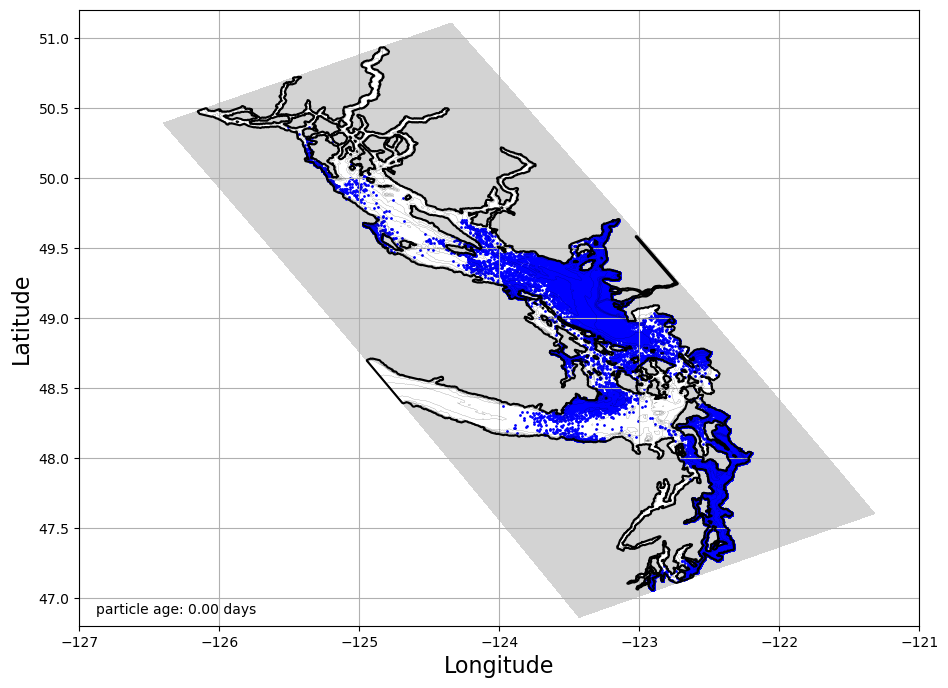

In [ ]:
fps=5
anim = mapanimation(outfile,N,n,-123,49,fps,local)
f = r"/home/jvalenti/MOAD/animations/fibreSStest.gif" 
FFwriter = animation.FFMpegWriter()
anim.save(f, writer = FFwriter)

In [ ]:
# with open(f,'rb') as anim:
#   display(Image(anim.read()))

In [ ]:
def load_config(config_yaml):
   with open(config_yaml) as f:
       config = yaml.safe_load(f)
   return config

def loadyamls(config):
    param = load_config(config)
    start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
    Tmax = param['param']['length'] # Set Time length [days] 
    duration = timedelta(days=Tmax)
    dt = param['param']['dt'] #toggle between - or + to pick backwards or forwards 
    N = param['param']['N'] # number of deploying locations
    n = param['param']['n'] # 1000   # number of particles per location
    dmin = param['param']['dmin'] #minimum depth
    dd = param['param']['dd'] #max depth difference from dmin
    name = param['file']['name'] #name output file
    daterange = [start+timedelta(days=i) for i in range(Tmax)]
    fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
    outfile = os.path.join(paths['out'], fn)
    MFc = param['param']['MFc']
    return outfile, MFc

In [ ]:
# outfile , MFc=loadyamls(config)
# coords=xr.open_dataset(paths['coords'],decode_times=False)
# ds = xr.open_dataset(outfile)
# DS=ds.to_dataframe()
# time=np.array(DS.xs(0, level='traj').iloc[:,3])
# mask = xr.open_dataset(paths['mask'])
# conc=np.zeros((coords.nav_lon.shape[0],coords.nav_lon.shape[1],mask.gdepw_0.shape[1]))
# jjii = xr.open_dataset('~/MOAD/grid/grid/grid_from_lat_lon_mask999.nc')
# arr = mask.gdepw_0[0,:,240,340]
# dss=DS[DS.beached==0]## In the water column
# dssla=np.array(dss.lat)
# dsslo=np.array(dss.lon)
# dsscon = float(MFc)
# dssdep=np.array(dss.z)

# for i in range(len(dss)):
#     if i%1e3==0:
#         print(f'{100*i/len(dss):.2f}% done.')
#     jj = jjii.jj.sel(lats=dssla[i], lons=dsslo[i], method='nearest').item()
#     ii = jjii.ii.sel(lats=dssla[i], lons=dsslo[i], method='nearest').item()
#     try:
#         dep = (np.abs(arr - dssdep[i])).argmin()
#         if arr[dep] > dssdep[i]:
#             dep+=-1
#         conc[jj,ii,dep] += dsscon
#     except ValueError:
#         pass
    
# data_set=xr.Dataset(coords={'lat': (['x', 'y'], coords.nav_lat.data),
#                 'lon': (['x', 'y'], coords.nav_lon.data),'depth':arr})
# data_set["Prob"]=(['x', 'y','z'], conc)
# param = load_config(config)
# data_set.load().to_netcdf(path='/home/jvalenti/MOAD/results/'+param['file']['name']+'_prob'+str(param['startdate']['year'])+'.nc')

In [ ]:
conc=xr.open_dataarray('/home/jvalenti/MOAD/results/Salish2018_150_prob2018.nc')

In [ ]:
conc=xr.open_dataarray('/home/jvalenti/MOAD/results/Salish2018_long_prob2018.nc')

In [ ]:
mascara = mask.umask[0,0,:,:]

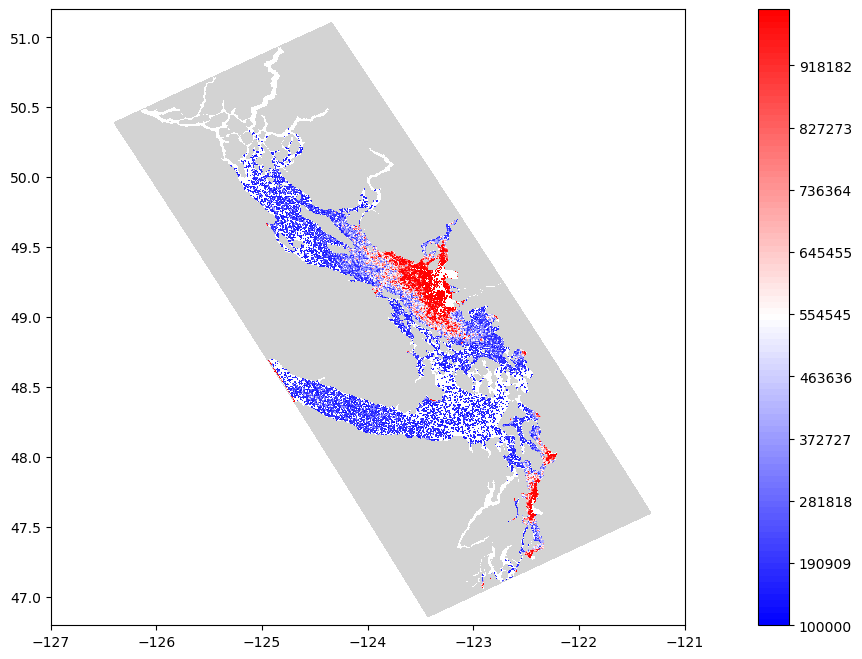

In [ ]:
fig = plt.figure(figsize=(19, 8))
#axs = plt.axes(xlim=(-123.25,-122.8),ylim=(49,49.25))
axs=plt.axes(xlim=(-127,-121),ylim=(46.8,51.2))
plot = conc[:,:,0]/50

levels = np.linspace(1e5,1e6,100)

colors = list(cmocean.cm.dense(np.linspace(0,1,len(levels)-1)))
colors[-1] = "red"
cmap = matplotlib.colors.ListedColormap(colors,"", len(colors))


# #axs.contourf(coords.nav_lon, coords.nav_lat, mask.bathym[0,:,:],levels=np.arange(0,400,10),cmap=cmocean.cm.deep,alpha=1)
a=axs.contourf(coords.nav_lon, coords.nav_lat, plot,levels=levels,cmap='bwr')
 #axs.scatter(frs_lon,frs_lat)
axs.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')

# #axs.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
plt.colorbar(a)

axs.set_aspect(1/np.sin(np.deg2rad(49)))

In [ ]:
# vol=xr.open_dataset('/home/jvalenti/MOAD/grid/grid/mesh_maskBV201702.nc')['volume_cell']
# def get_conc(latmin,latmax,lonmin,lonmax, conc):
#     jjii = xr.open_dataset('~/MOAD/grid/grid/grid_from_lat_lon_mask999.nc')
#     j = [jjii.jj.sel(lats=latmin, lons=lonmin, method='nearest').item()]
#     i = [jjii.ii.sel(lats=latmin, lons=lonmin, method='nearest').item()]
#     j.append(jjii.jj.sel(lats=latmin, lons=lonmax, method='nearest').item())
#     i.append(jjii.ii.sel(lats=latmin, lons=lonmax, method='nearest').item())
#     j.append(jjii.jj.sel(lats=latmax, lons=lonmin, method='nearest').item())
#     i.append(jjii.ii.sel(lats=latmax, lons=lonmin, method='nearest').item())
#     j.append(jjii.jj.sel(lats=latmax, lons=lonmax, method='nearest').item())
#     i.append(jjii.ii.sel(lats=latmax, lons=lonmax, method='nearest').item())
#     a=[min(j),max(j),min(i),max(i)]
#     Len = (a[1]-a[0])*(a[3]-a[2])
#     SD = []
#     Mean = []
#     for ki in range(len(z)):
#         values = []
#         vols = []
#         for j in range(a[0],a[1],1):
#             for i in range(a[2],a[3],1):
#                 values.append(conc[j,i,ki])
#                 vols.append(vol[0,ki,j,i])
#         values = np.array(values)
#         vols = np.array(vols)
#         Mean.append(np.sum(values)/np.sum(vols))
#         valuess = np.divide(values,vols)
#         SD.append(np.std(valuess)/np.sqrt(Len))
#     return Mean,SD
# def MP_measure(conc):
#     Fraser_MP,Fraser_SE=get_conc(49.1,49.13,-123.2,-123.16,conc)
#     SoG_MP,SoG_SE =get_conc(49.2,49.3,-123.5,-123.7,conc)
#     Lori_MP,Lori_SE =get_conc(49.1,49.36,-123.3,-123.2,conc)
#     return Fraser_MP,Fraser_SE, Lori_MP,Lori_SE,SoG_MP,SoG_SE
# z = mask.gdepw_0[0,:,240,340]

# F1,FE1,L1,LE1,S1,SE1=MP_measure(conc)
# dict = {'F1':F1,'FE1':FE1,'L1':L1,'LE1':LE1,'S1':S1,'SE1':SE1}
# df = pd.DataFrame(dict) 
# df.to_csv('resultsSalishS.csv')

In [ ]:
def MP_measur(ax,RES):
    label = ['Puget Seattle','Puget Admiralty','JdF East','JdF West','Central SoG','North SoG','Fraser Plume']
    ax[0].errorbar(RES.PugC_MP, -z, xerr = RES.PugC_SE,label=label[0])
    ax[1].errorbar(RES.PugN_MP, -z, xerr = RES.PugN_SE,label=label[1])
    ax[2].errorbar(RES.JdFE_MP, -z, xerr = RES.JdFE_SE,label=label[2])
    ax[3].errorbar(RES.JdFW_MP, -z, xerr = RES.JdFE_SW,label=label[3])
    ax[4].errorbar(RES.SoGC_MP, -z, xerr = RES.SoGC_SE,label=label[4])
    ax[5].errorbar(RES.SoGN_MP, -z, xerr = RES.SoGN_SE,label=label[5])
    ax[6].errorbar(RES.Fraser_MP, -z, xerr = RES.Fraser_SE,label=label[6])
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[3].legend()
    ax[4].legend()
    ax[5].legend()
    ax[6].legend()
    ax[0].set_ylim(-30,2)
    ax[1].set_ylim(-30,2)
    ax[2].set_ylim(-30,2)
    return 

Text(0.5, 0.01, 'MF concentration ($MF/m^3$)')

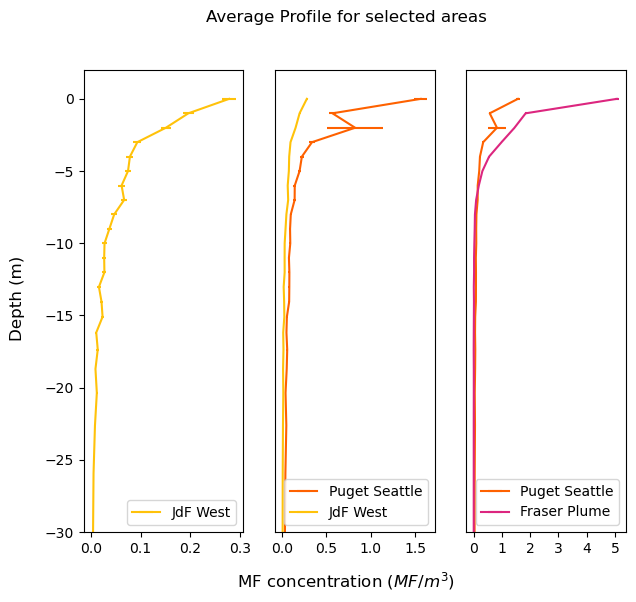

In [ ]:
RES = pd.read_csv('resultsSalish3.csv',index_col=[0])/50
z = mask.gdepw_0[0,:,240,340]
label = ['Puget Seattle','JdF West','Fraser Plume']
fig,ax=plt.subplots(1,3,figsize=(7,6))
ax[1].errorbar(RES.PugC_MP, -z, xerr = RES.PugC_SE,label=label[0],c=[254/255, 97/255, 0/255])
ax[2].errorbar(RES.PugC_MP, -z, xerr = RES.PugC_SE,label=label[0],c=[254/255, 97/255, 0/255])
ax[0].errorbar(RES.JdFW_MP, -z, xerr = RES.JdFE_SW,label=label[1],c=[255/255, 194/255, 10/255])
ax[1].errorbar(RES.JdFW_MP, -z, xerr = RES.JdFE_SW,label=label[1],c=[255/255, 194/255, 10/255])
ax[2].errorbar(RES.Fraser_MP, -z, xerr = RES.Fraser_SE,label=label[2],c=[220/255, 38/255, 127/255])
ax[0].set_xticks(np.arange(0,0.4,0.1))
ax[1].set_xticks(np.arange(0,2,0.5))
ax[2].set_xticks(np.arange(0,6,1))
ax[1].set_yticks([])
ax[2].set_yticks([])

ax[0].set_ylim(-30,2)
ax[1].set_ylim(-30,2)
ax[2].set_ylim(-30,2)
ax[0].legend(loc=4)
ax[1].legend(loc=4)
ax[2].legend(loc=4)
plt.suptitle('Average Profile for selected areas')
fig.supylabel('Depth (m)')
fig.supxlabel('MF concentration ($MF/m^3$)')


In [ ]:
z

<xarray.DataArray 'gdepw_0' (z: 40)>
array([  0.      ,   1.000001,   2.000006,   3.000019,   4.000047,   5.000104,
         6.000217,   7.000441,   8.000879,   9.001736,  10.003407,  11.006662,
        12.013008,  13.025366,  14.049429,  15.096255,  16.187304,  17.364035,
        18.705973,  20.363474,  22.613064,  25.937412,  31.101034,  39.11886 ,
        50.963238,  67.05207 ,  86.96747 , 109.73707 , 134.34593 , 160.02956 ,
       186.30528 , 212.89656 , 239.65305 , 266.4952  , 293.3816  , 320.29077 ,
       347.2116  , 374.1385  , 401.06845 , 428.      ], dtype=float32)
Dimensions without coordinates: z
Attributes:
    standard_name:  gdepw_0
    long_name:      depth of W-grid points
    units:          m
    positive:       down

In [ ]:
conc

<xarray.DataArray 'Prob' (x: 898, y: 398, z: 40)>
[14296160 values with dtype=float64]
Coordinates:
    lat      (x, y) float32 ...
    lon      (x, y) float32 ...
    depth    (z) float32 ...
Dimensions without coordinates: x, y, z

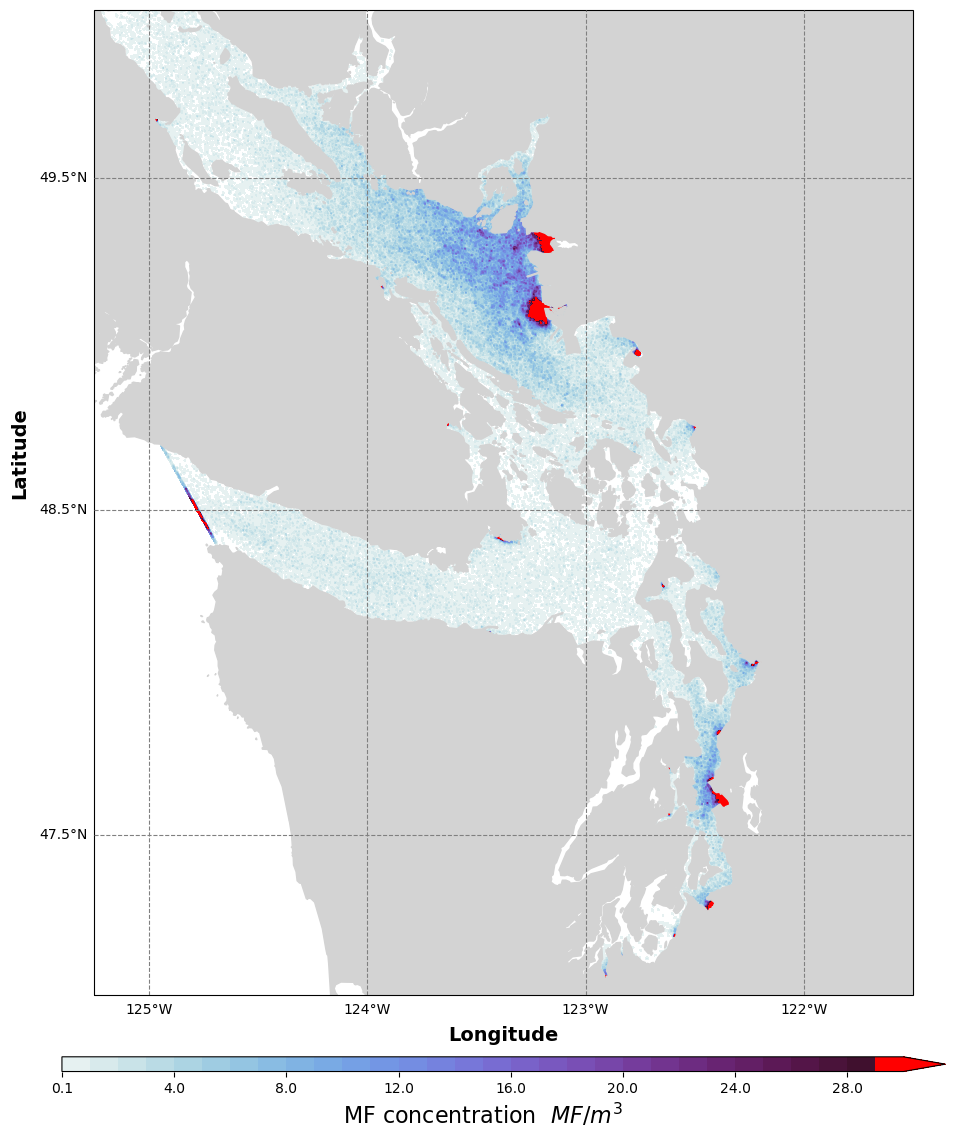

In [ ]:
# Make map

import matplotlib.patches as mpatches
a = [0.1]
b = list(np.linspace(1,30,30))
levels = a+b
#levels = list(np.linspace(0,30,31))

fig, ax = plt.subplots(figsize=(38, 16), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-125.25, -121.5, 47, 50], crs=crs.PlateCarree())
colors = list(cmocean.cm.dense(np.linspace(0,1,len(levels)-1)))
colors[-1] = "red"
cmap = matplotlib.colors.ListedColormap(colors,"", len(colors))

ax.add_feature(feature.GSHHSFeature('high', facecolor='lightgray',edgecolor='lightgray'),zorder=2)
im=ax.contourf(coords.nav_lon, coords.nav_lat, np.sum(conc[:,:,0:3], axis = 2)/(12.5e6),transform=crs.PlateCarree(),levels=levels,cmap=cmap,extend='max')

gl = ax.gridlines(
    linestyle='--', color='gray', draw_labels=True,
    xlocs=list(np.arange(-125,-121,1)), ylocs=list(np.arange(47.5,50.5,1)),zorder=5)
gl.top_labels, gl.right_labels = False, False

cbar = fig.colorbar(im, location='bottom',aspect=60,shrink=0.3,pad=0.05)

cbar.set_label('MF concentration  $MF/m^3$',fontsize = 16)

# ax.add_patch(mpatches.Rectangle(xy=[-123.25,48.2], width=0.2, height=0.1,
#                                     facecolor=(245/255, 255/255, 40/255),
#                                     alpha=0.5,
#                                     transform=crs.PlateCarree(),zorder=5)
#                  )
# ax.add_patch(mpatches.Rectangle(xy=[-124.25,48.3], width=0.2, height=0.1,
#                                     facecolor=(255/255, 194/255, 10/255),
#                                     alpha=0.5,
#                                     transform=crs.PlateCarree(),zorder=5)
#                  )
# # ax.add_patch(mpatches.Rectangle(xy=[-124,49.3], width=0.2, height=0.1,
# #                                     facecolor=(245/255, 255/255, 40/255),
# #                                     alpha=0.5,
# #                                     transform=crs.PlateCarree(),zorder=5)
# #                  )
# ax.add_patch(mpatches.Rectangle(xy=[-123.5,49.15], width=0.2, height=0.1,
#                                     facecolor=(220/255, 38/255, 127/255),
#                                     alpha=0.5,
#                                     transform=crs.PlateCarree(),zorder=5)
#                  )
# # ax.add_patch(mpatches.Rectangle(xy=[-124.9,49.8], width=0.2, height=0.1,
# #                                     facecolor=(245/255, 255/255, 40/255),
# #                                     alpha=0.5,
# #                                     transform=crs.PlateCarree(),zorder=5)
# #                  )
# # ax.add_patch(mpatches.Rectangle(xy=[-122.75,48], width=0.2, height=0.1,
# #                                     facecolor=(245/255, 255/255, 40/255),
# #                                     alpha=0.5,
# #                                     transform=crs.PlateCarree(),zorder=5)
# #                  )
# ax.add_patch(mpatches.Rectangle(xy=[-122.48,47.8], width=0.09, height=0.1,
#                                     facecolor=(254/255, 97/255, 0/255),
#                                     alpha=0.5,
#                                     transform=crs.PlateCarree(),zorder=5)
#                 )



ax.text(-0.08, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")
ax.text(0.5, -0.05, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")
plt.savefig("/home/jvalenti/MOAD/conc2.pdf")

In [ ]:
Mean_conc = np.sum(conc[:,:,0:3], axis = 2)/(12.5e6)
